# Twitter sentiment analysis

## Introduction

We will predict positive (1) or negative (0) sentiment in this binary classification task and comparing the accuracy

## Dataset

We will analyse the Sentiment140 dataset to train various models to accurately predict the sentiment (positive or negative) of a tweet. The dataset contains 1.6 million tweets, with 800,000 positive tweets and 800,000 negative tweets

## Machine Learning

We will look at two models done in Logistic Regression
</ul>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud #pip install wordcloud

import nltk #pip install nltk

#term frequency–inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# download important nltk packages
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksenagi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ksenagi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ksenagi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ksenagi\AppData\Roaming\nltk_data...


True

In [3]:
#save requirements
#!pip freeze > requirements.txt
#from helpers import *
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

## Exploring the data

In [5]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", delimiter=",", 
                   encoding="ISO-8859-1", header=None)

In [6]:
data.shape

(1600000, 6)

In [7]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
data[[0, 5]].head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [12]:
data = data.rename(columns={0: "target", 5: "tweet"})
data = data.replace({"target":{4:1}})
data

,target,1,2,3,4,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


[Text(0.5, 1.0, 'Tweets Distribution: positive (1) and negative (0)')]

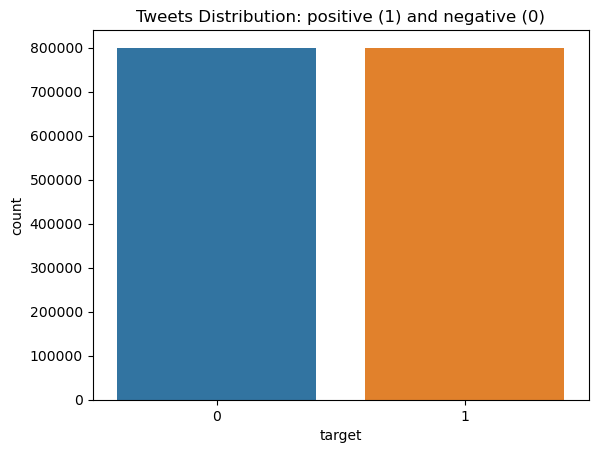

In [14]:
#sns.set_style("ticks")
sns.countplot(x=data.target, palette="tab10").set(title="Tweets Distribution: positive (1) and negative (0)")

In [15]:
len(data.target)

1600000

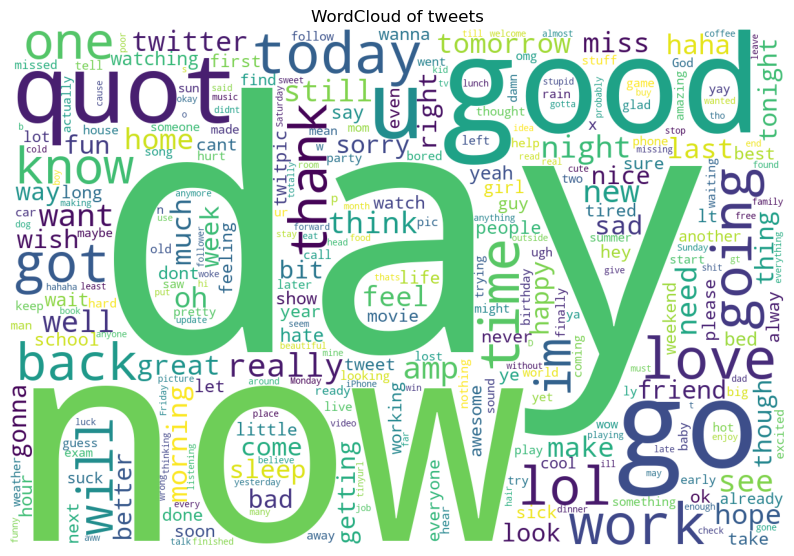

In [16]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(max_words=300, width=1200, height=800, background_color='white',
                        collocations=False).generate(" ".join(data.tweet))
plt.grid(None)
plt.title("WordCloud of tweets")
plt.axis('off')
plt.imshow(wordcloud)

## Baseline: Logistic Regression with TF-IDF vectorizer

In [17]:
X = data["tweet"]
y = np.array(data["target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Splitting done.")
print("Shape of training set: " + str(X_train.shape))
print("Shape of test shape: " + str(X_test.shape))
print("Count of training target values: " + str(np.unique(y_train, return_counts=True)))
print("Count of test target values: " + str(np.unique(y_test, return_counts=True)))

Splitting done.
Shape of training set: (1120000,)
Shape of test shape: (480000,)
Count of training target values: (array([0, 1], dtype=int64), array([560639, 559361], dtype=int64))
Count of test target values: (array([0, 1], dtype=int64), array([239361, 240639], dtype=int64))


In [18]:
X[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [21]:
tfidfconverter = TfidfVectorizer(max_features=500000, min_df=0.2, max_df=0.8, ngram_range=(1,2))

In [22]:
tfidfconverter.fit(X_train)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [23]:
X_train[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [24]:
X_train = tfidfconverter.transform(X_train)
X_test = tfidfconverter.transform(X_test)

classification_model = LogisticRegression(max_iter=1000, n_jobs=-1)
classification_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
#classification_model.coef_
#y = mx + c

In [26]:
#Prediction
predictions = classification_model.predict(X_test)

In [27]:
X_train[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 2)>

In [28]:
def model_Evaluate(model, X_test, y_test):    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)    
    # Print the evaluation metrics for the dataset    
    print(classification_report(y_test, y_pred))   
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.54      0.31      0.39    239361
           1       0.52      0.74      0.61    240639

    accuracy                           0.52    480000
   macro avg       0.53      0.52      0.50    480000
weighted avg       0.53      0.52      0.50    480000



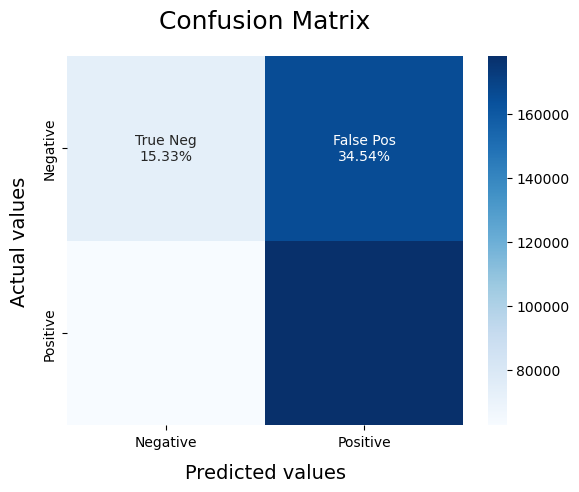

In [29]:
#Evaluation
model_Evaluate(classification_model, X_test, y_test)

## Test Other Data 

In [30]:
#"I love twitter", "I hate twitter", "I'm in an excellent mood", "This is terrible news"

In [31]:
X_test1 = tfidfconverter.transform(["This is terrible news"])

In [32]:
classification_model.predict(X_test1)

array([1], dtype=int64)

In [33]:
sent_analysis = classification_model.predict(X_test1)

In [34]:
print(sent_analysis)

[1]


In [35]:
if sent_analysis == 1:
    print("Positive sentiment")
else:
     print("Negative sentiment")

Positive sentiment
